GROWTH GR3 was initialized. Path to data: /storage/stations/GR3
Object has been terminated. "I'll be back."
9 .fits.gz files were found.
['/storage/stations/GR3/202305/20230523_053330.fits.gz', '/storage/stations/GR3/202305/20230523_060334.fits.gz'] Tue May 23 07:33:40 2023 Tue May 23 08:17:04 2023 [ 9.99997938e+07 -1.68480816e+17]
['/storage/stations/GR3/202305/20230523_060334.fits.gz', '/storage/stations/GR3/202305/20230523_063338.fits.gz', '/storage/stations/GR3/202305/20230523_070342.fits.gz', '/storage/stations/GR3/202305/20230523_073346.fits.gz', '/storage/stations/GR3/202305/20230523_080350.fits.gz', '/storage/stations/GR3/202305/20230523_083354.fits.gz', '/storage/stations/GR3/202305/20230523_090358.fits.gz'] Tue May 23 08:19:08 2023 Tue May 23 11:20:29 2023 [ 9.99924490e+07 -1.68469541e+17]
gps not ok []
['/storage/stations/GR3/202305/20230523_053330.fits.gz', '/storage/stations/GR3/202305/20230523_060334.fits.gz']
good gps /storage/stations/GR3/202305/20230523_053330.fits.gz 

"\ndata_fine, fine_freq = foo.time_series('10s', components=components)\nfigname = time[0] + '_' + fine_freq + '_timeseries'\nfoo.plot_time_series(attr='Height', stat='count', data=data_fine, freq=fine_freq, component=['terrestrial', 'thunderstorm'], file=figname)\n#figname = time[0] + '_cwt'\nfoo.plot_cwt(file='one_sec_cwt')\n"

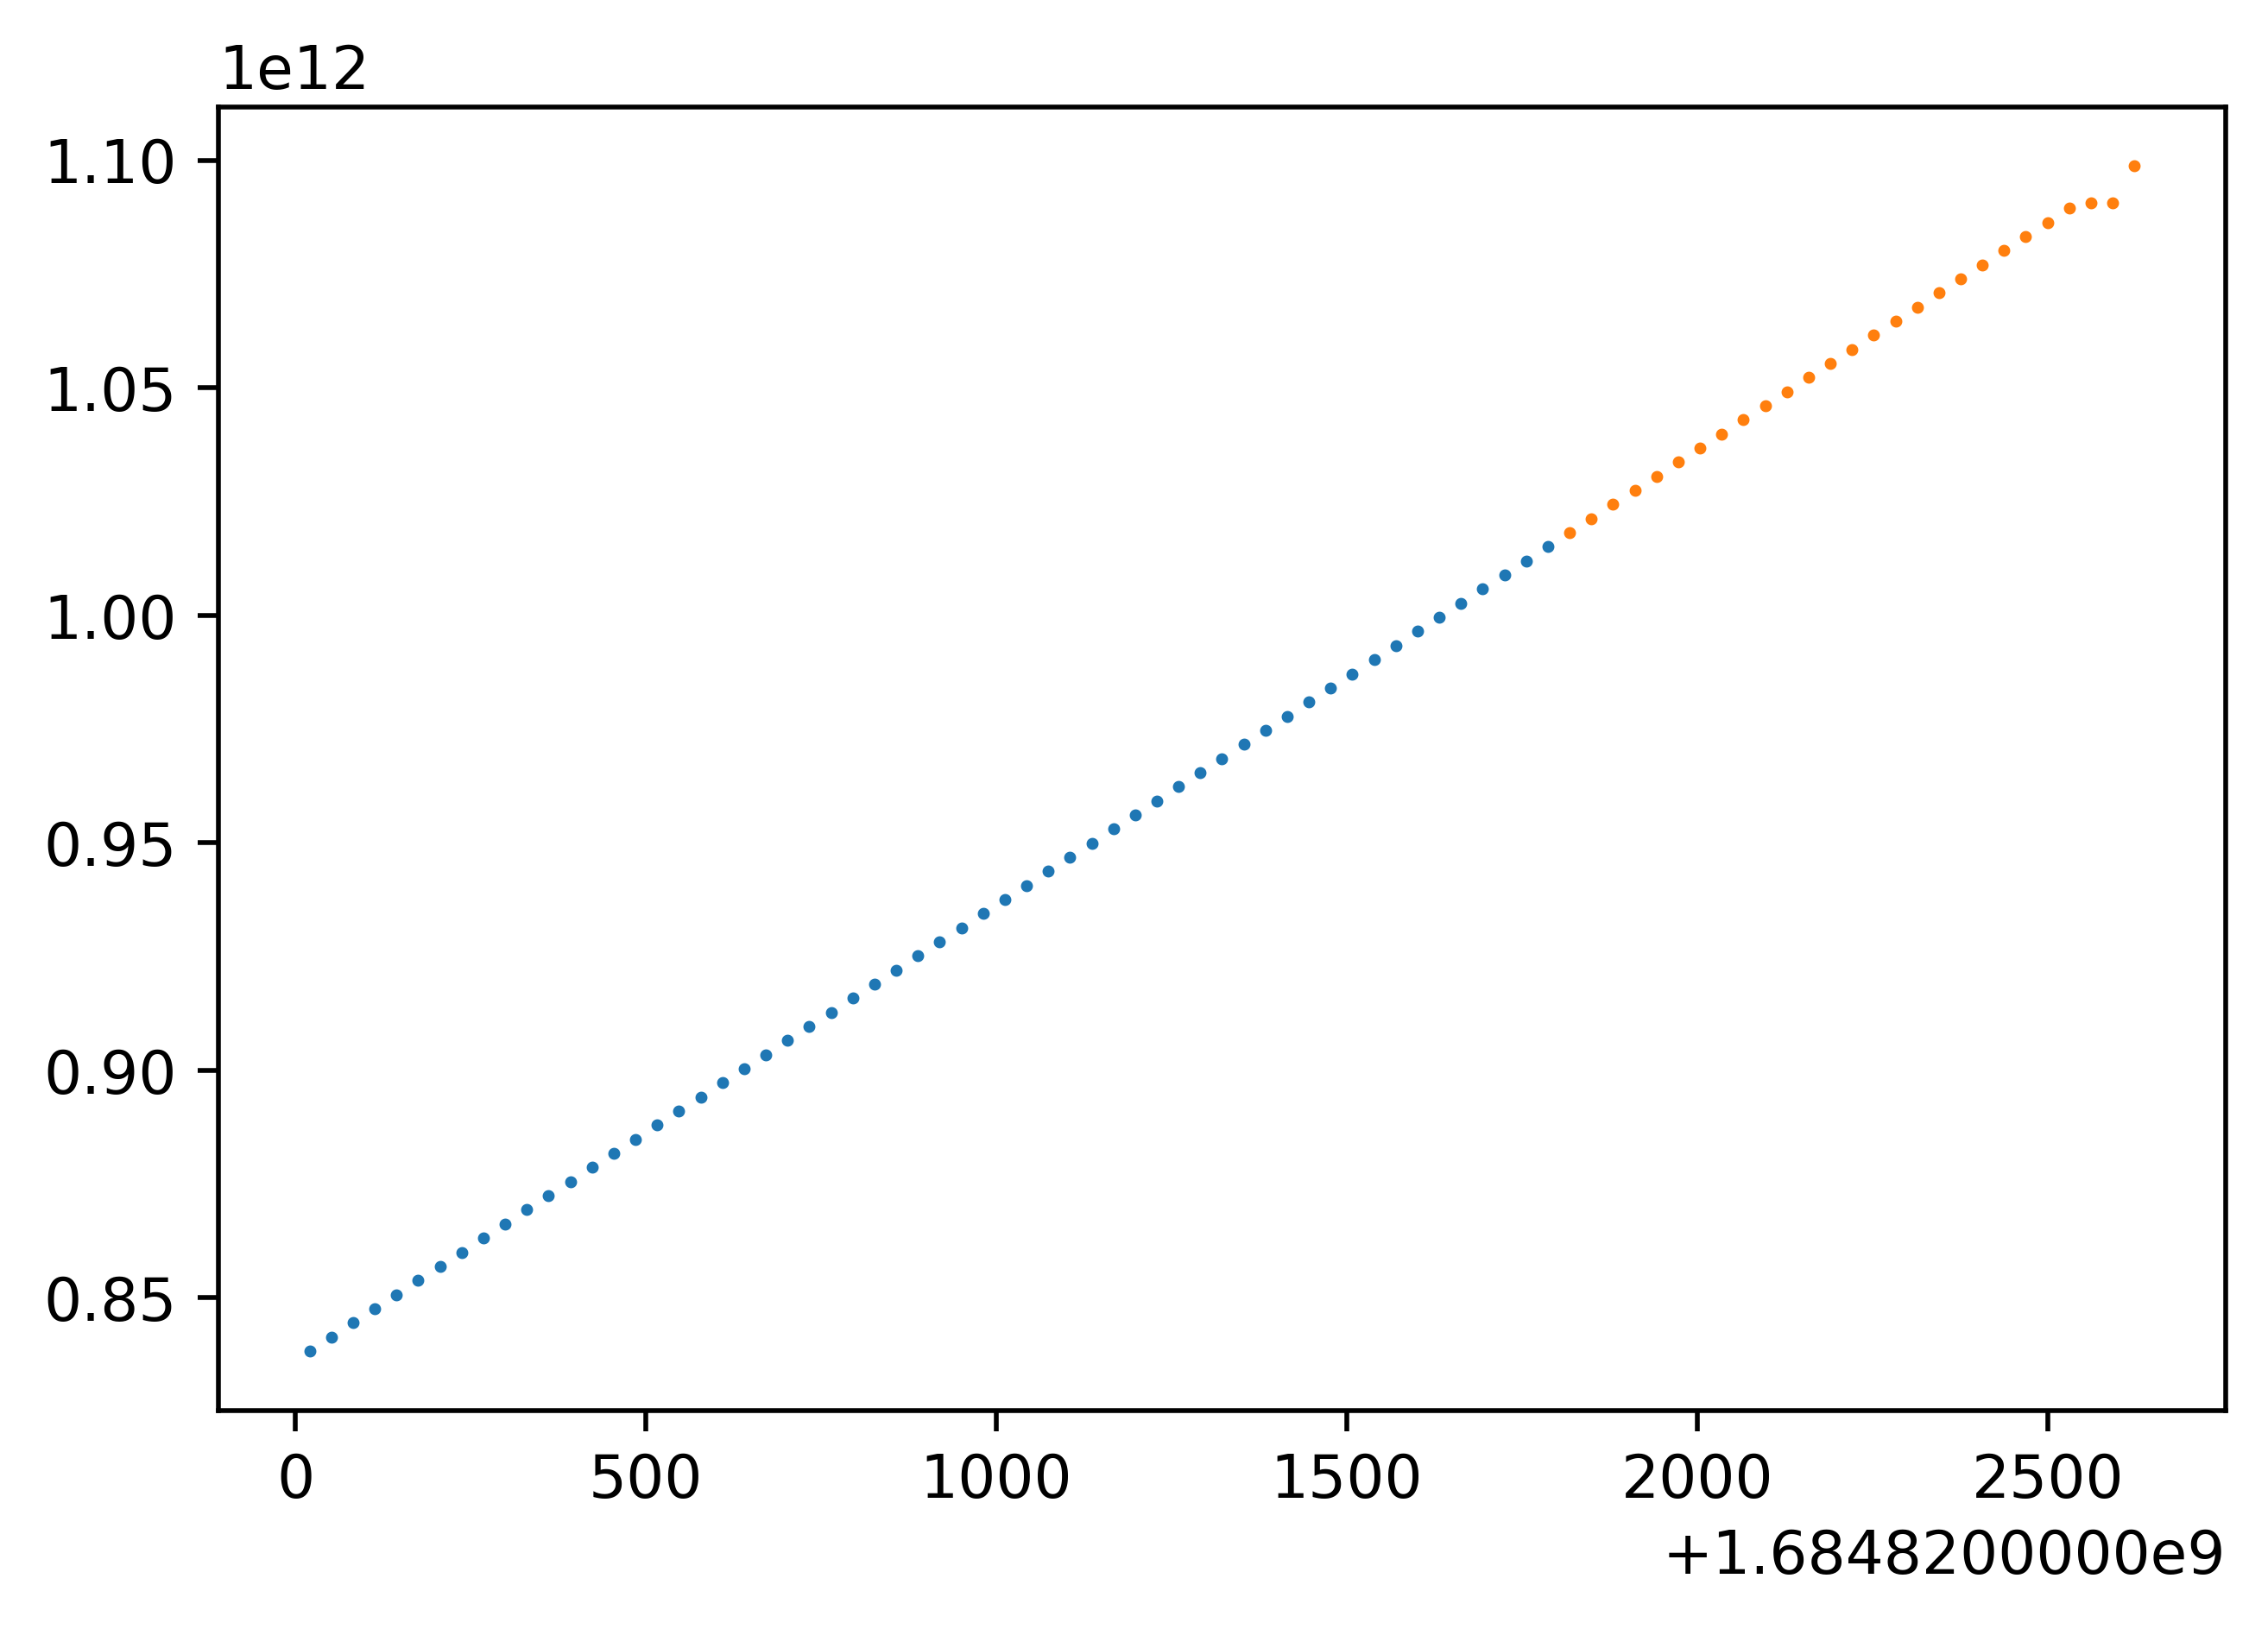

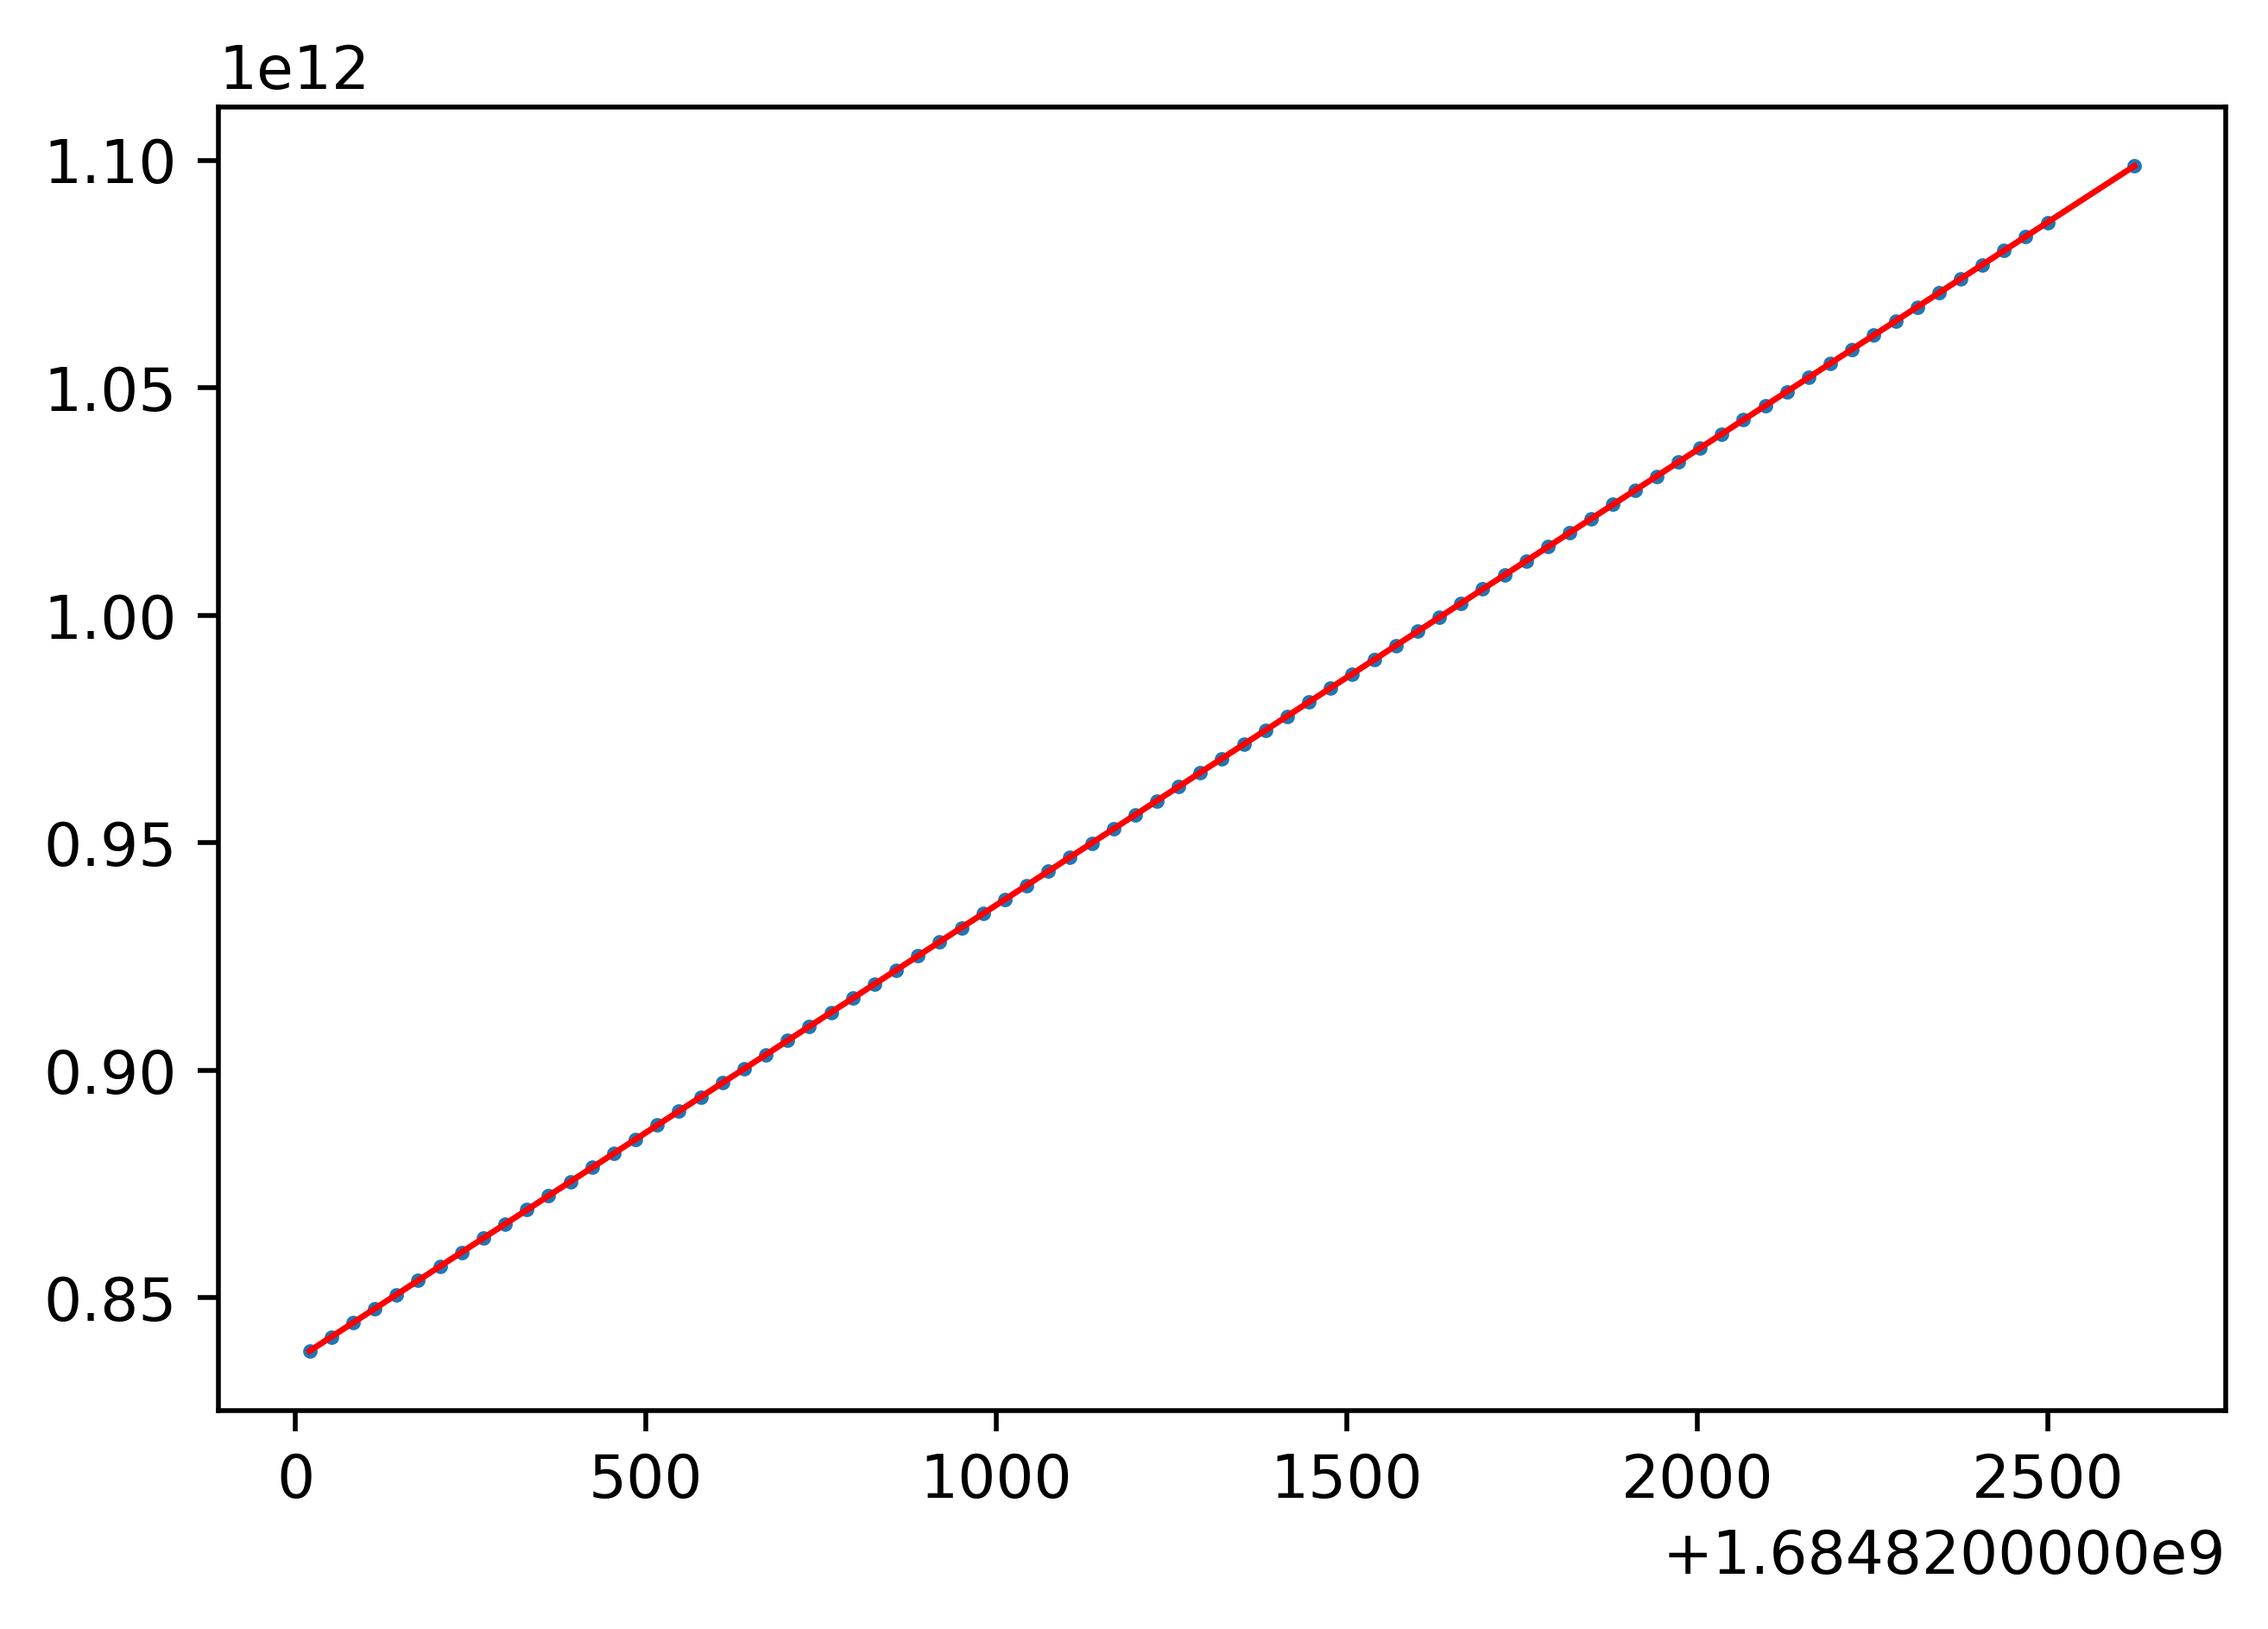

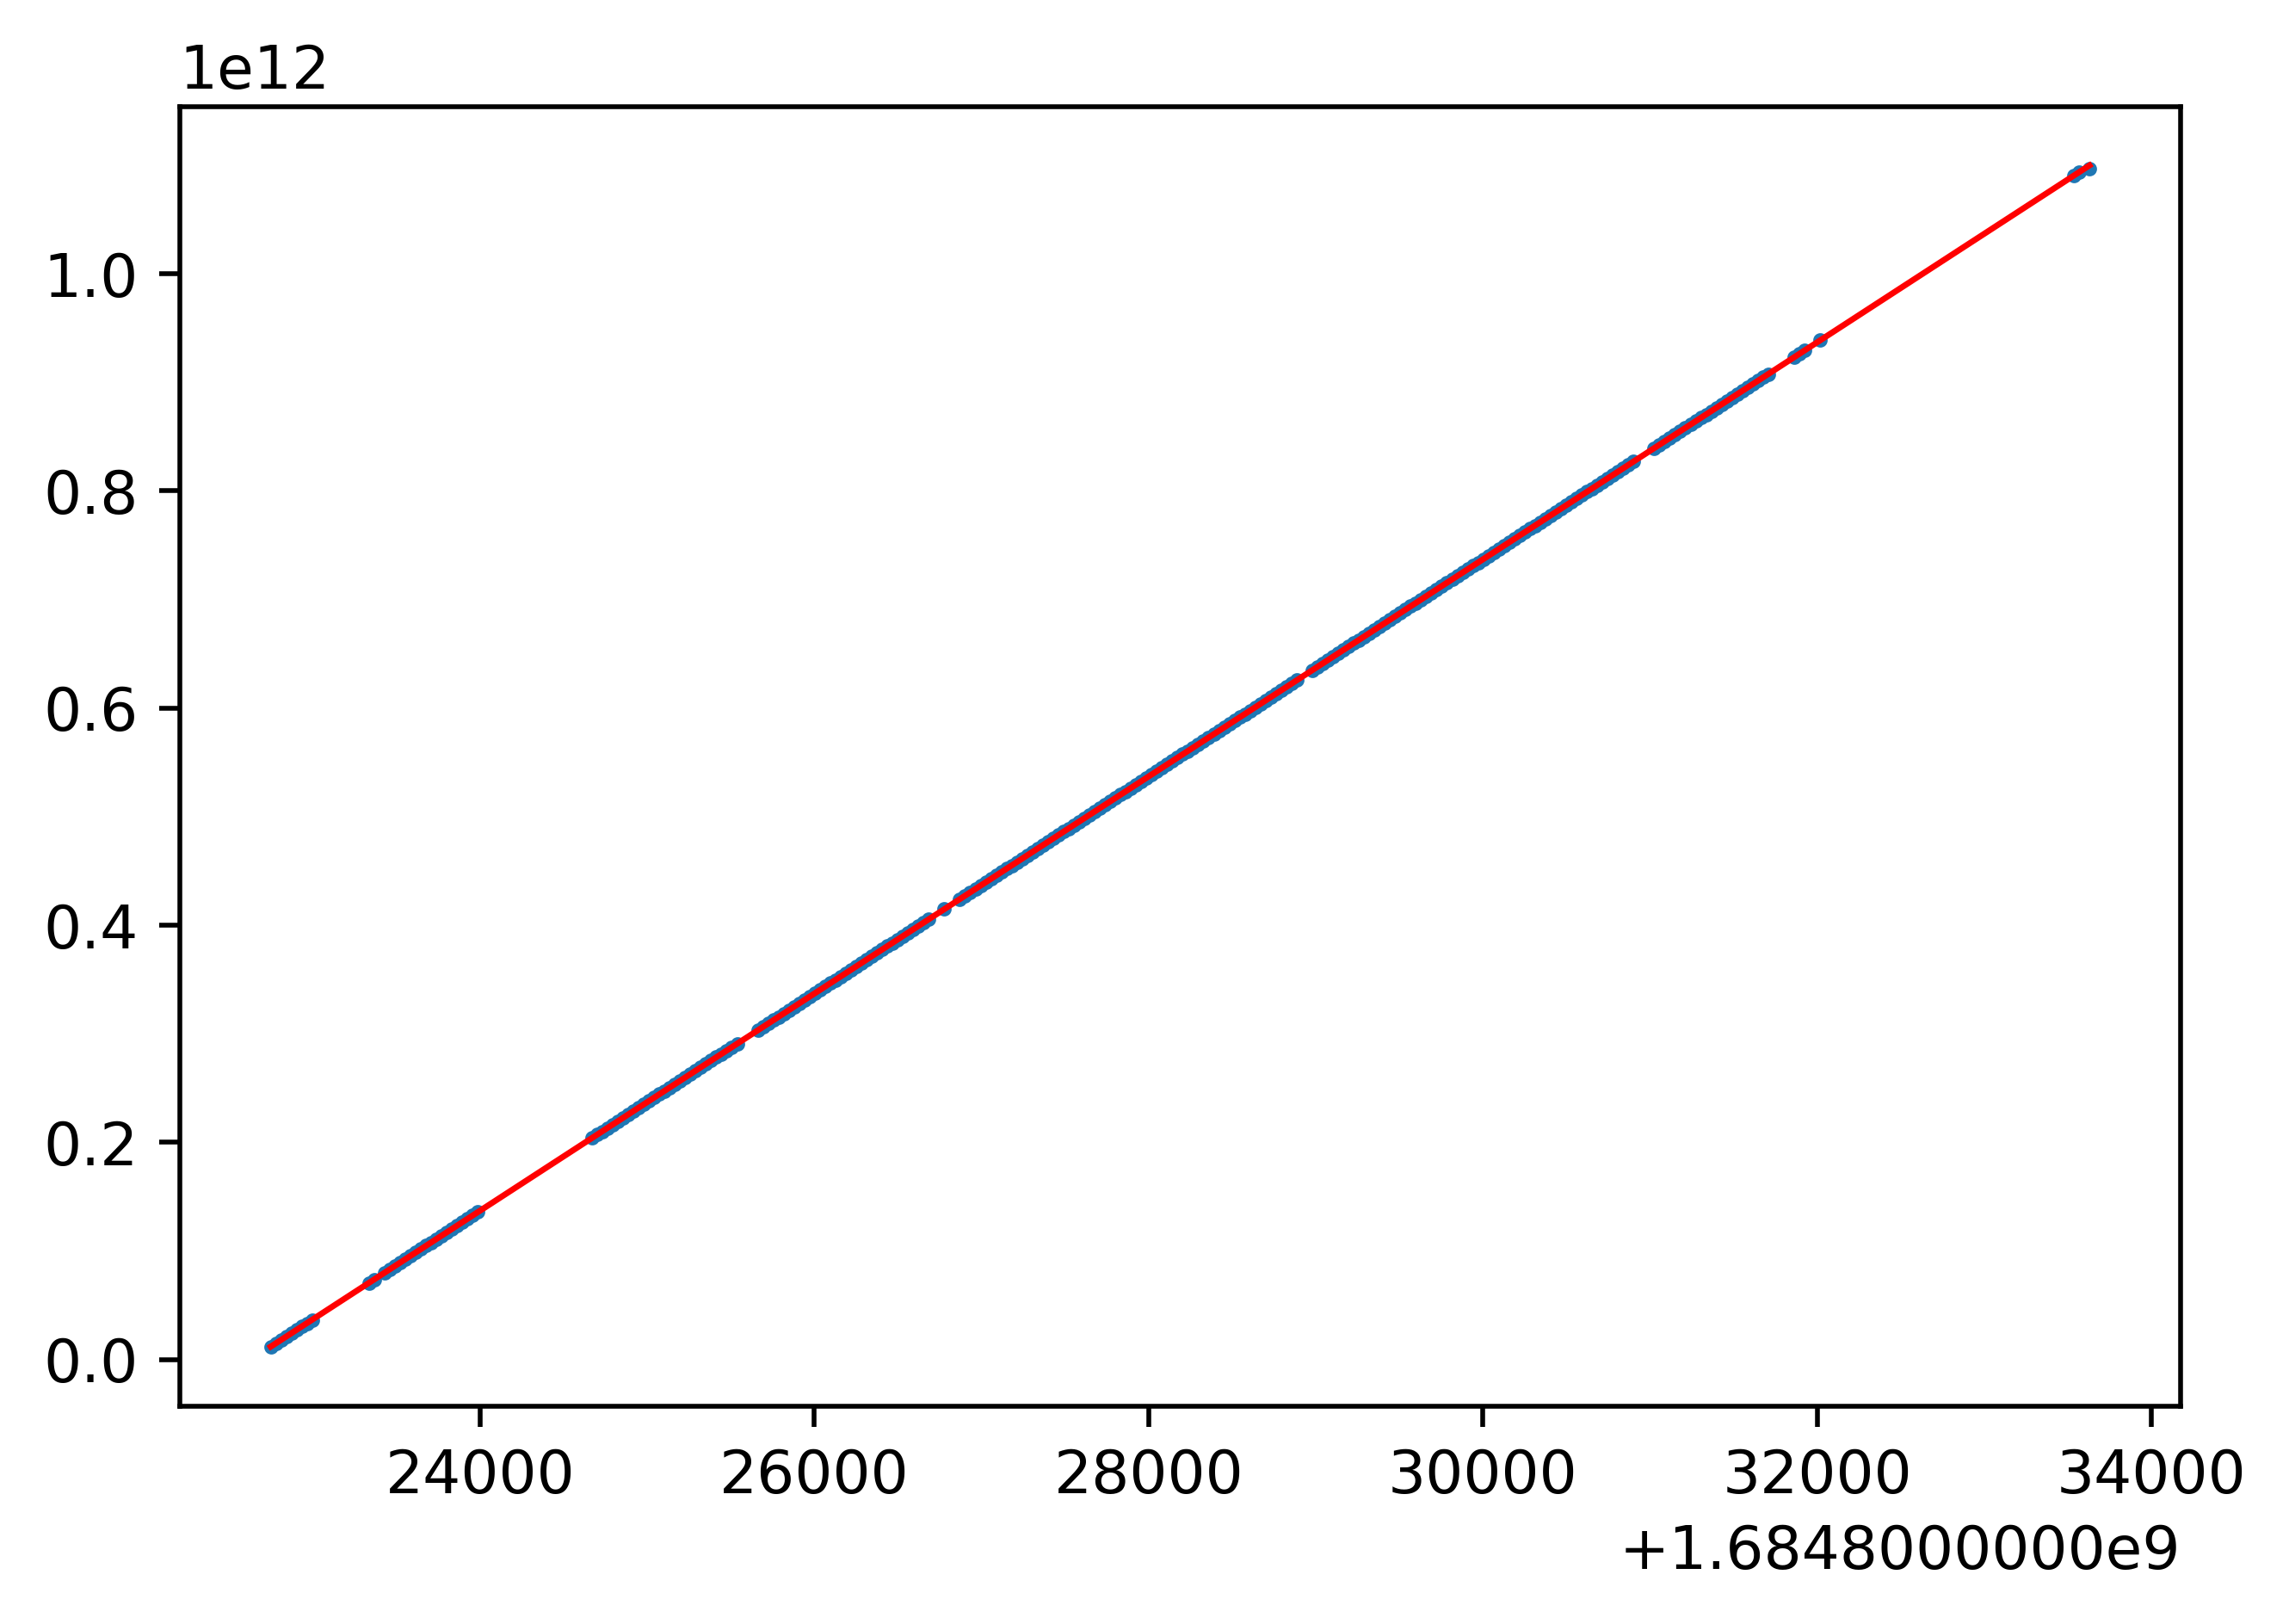

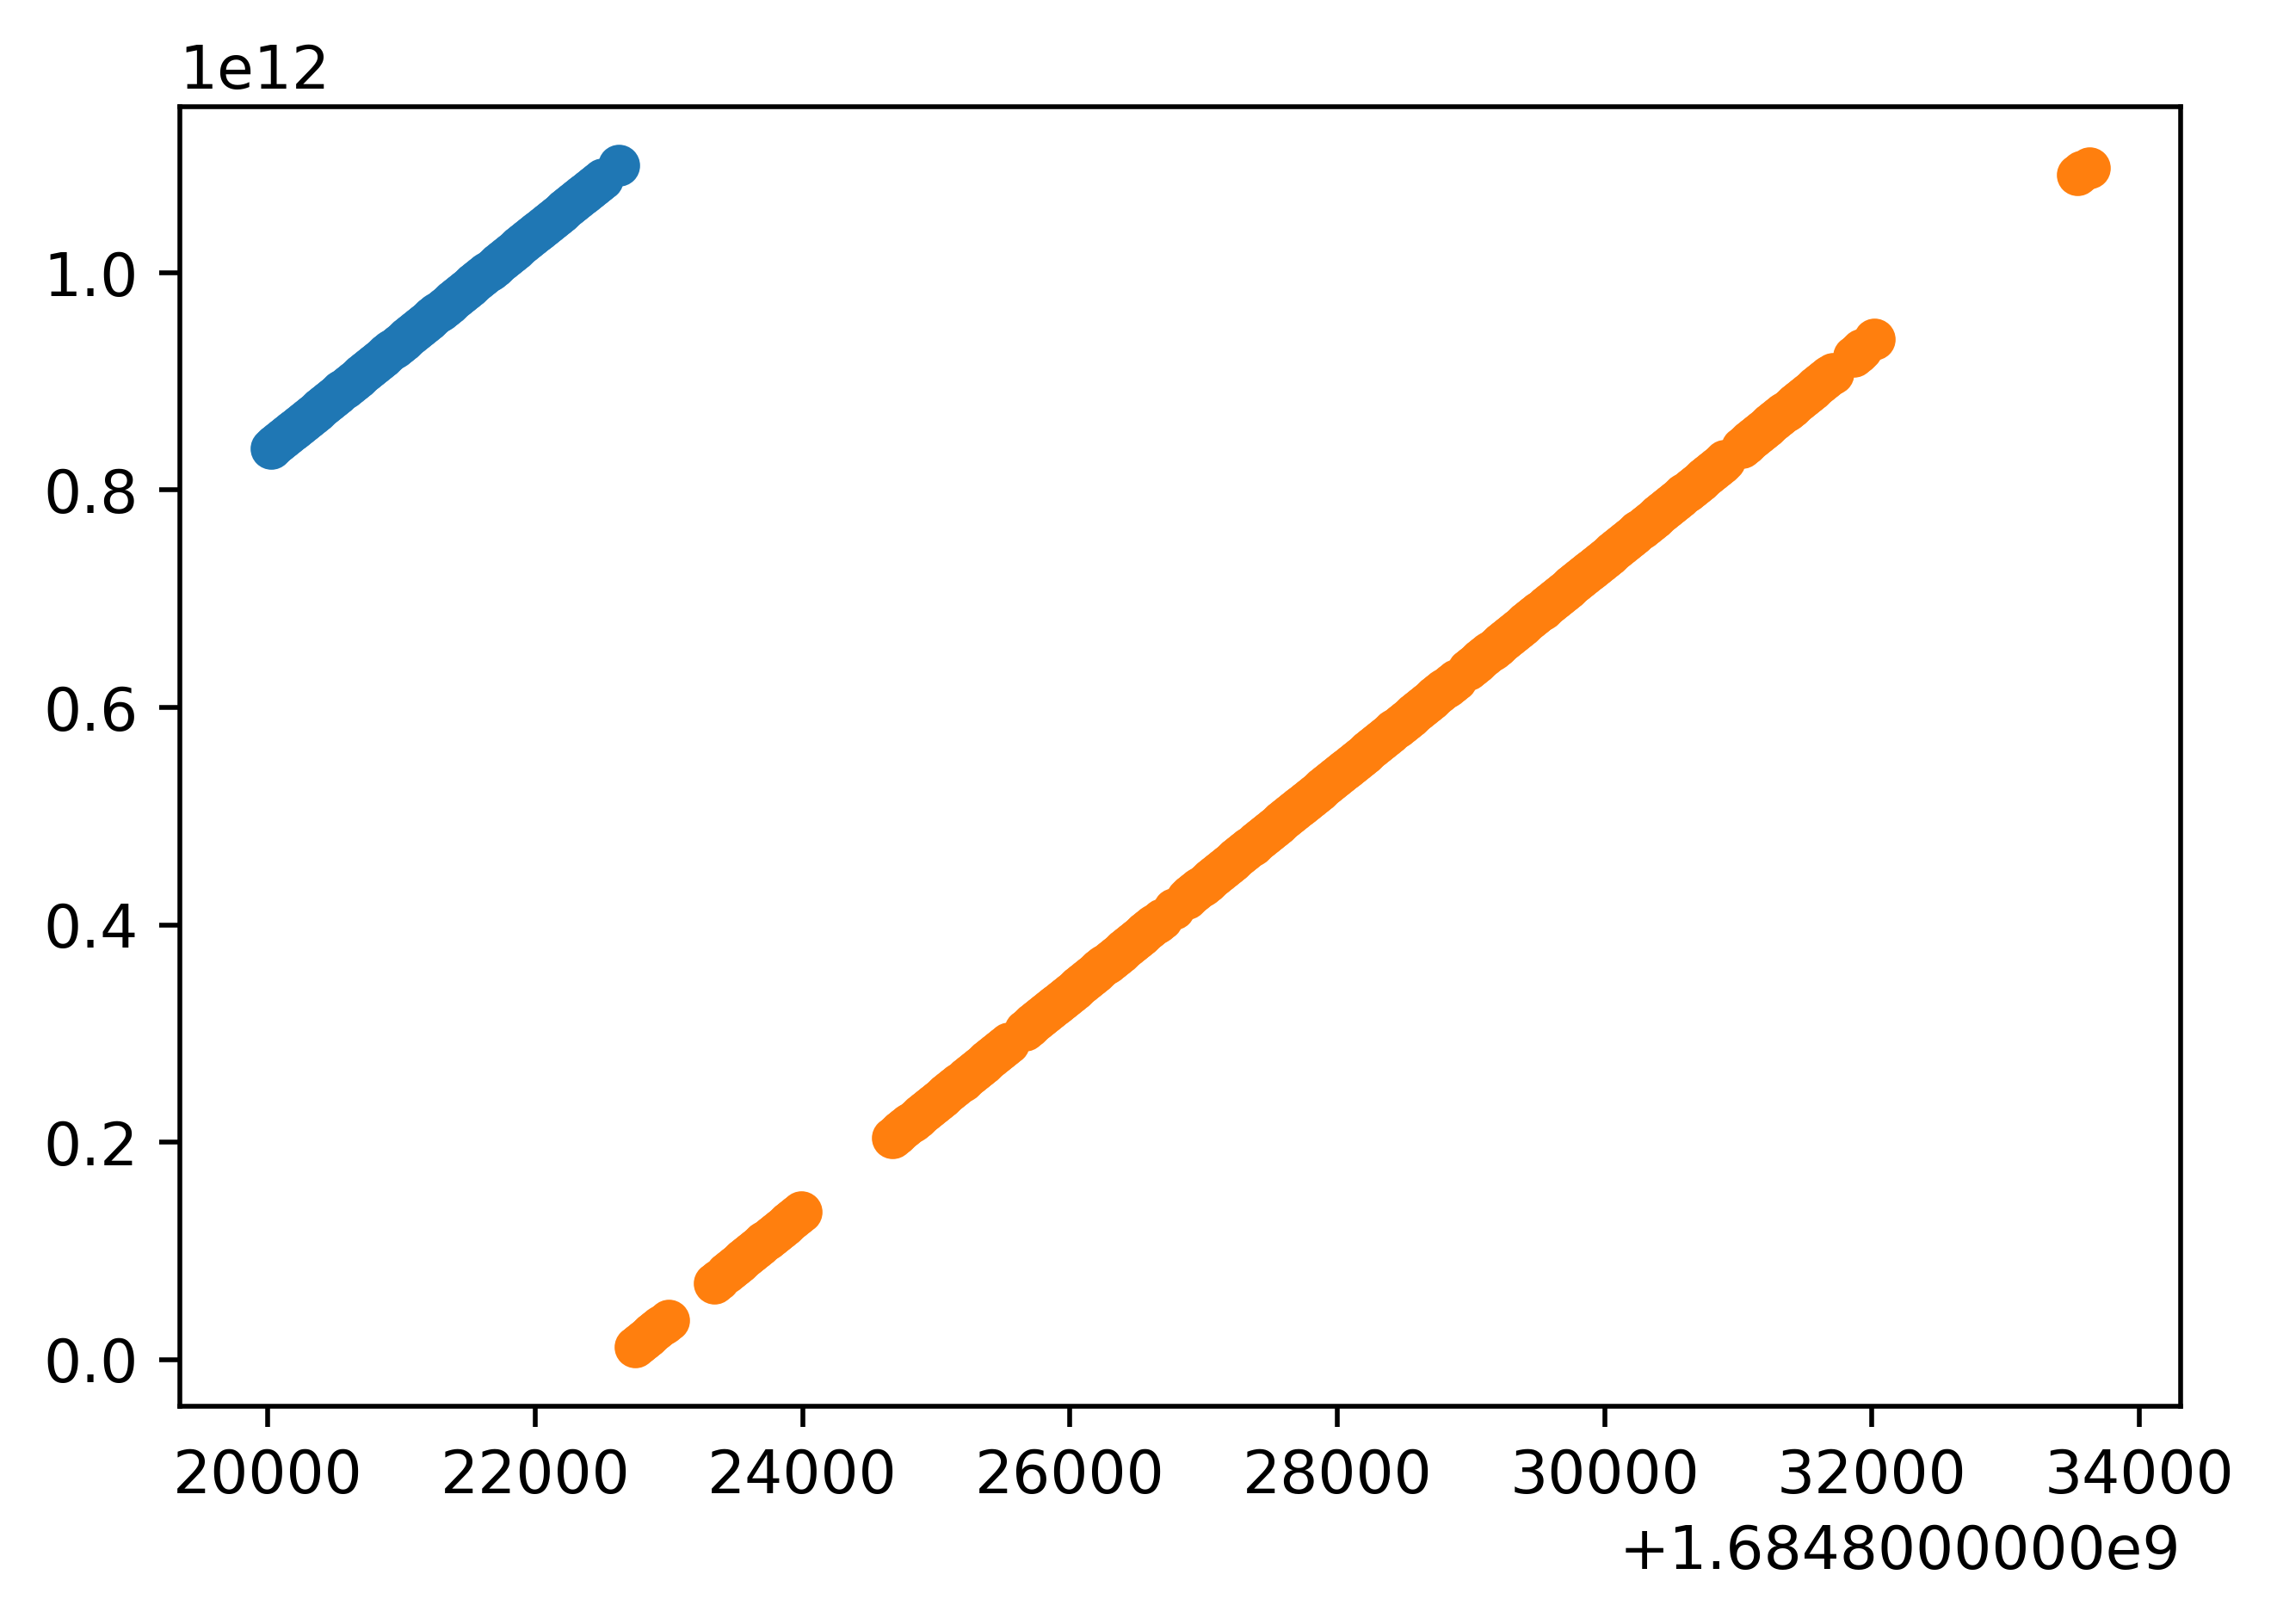

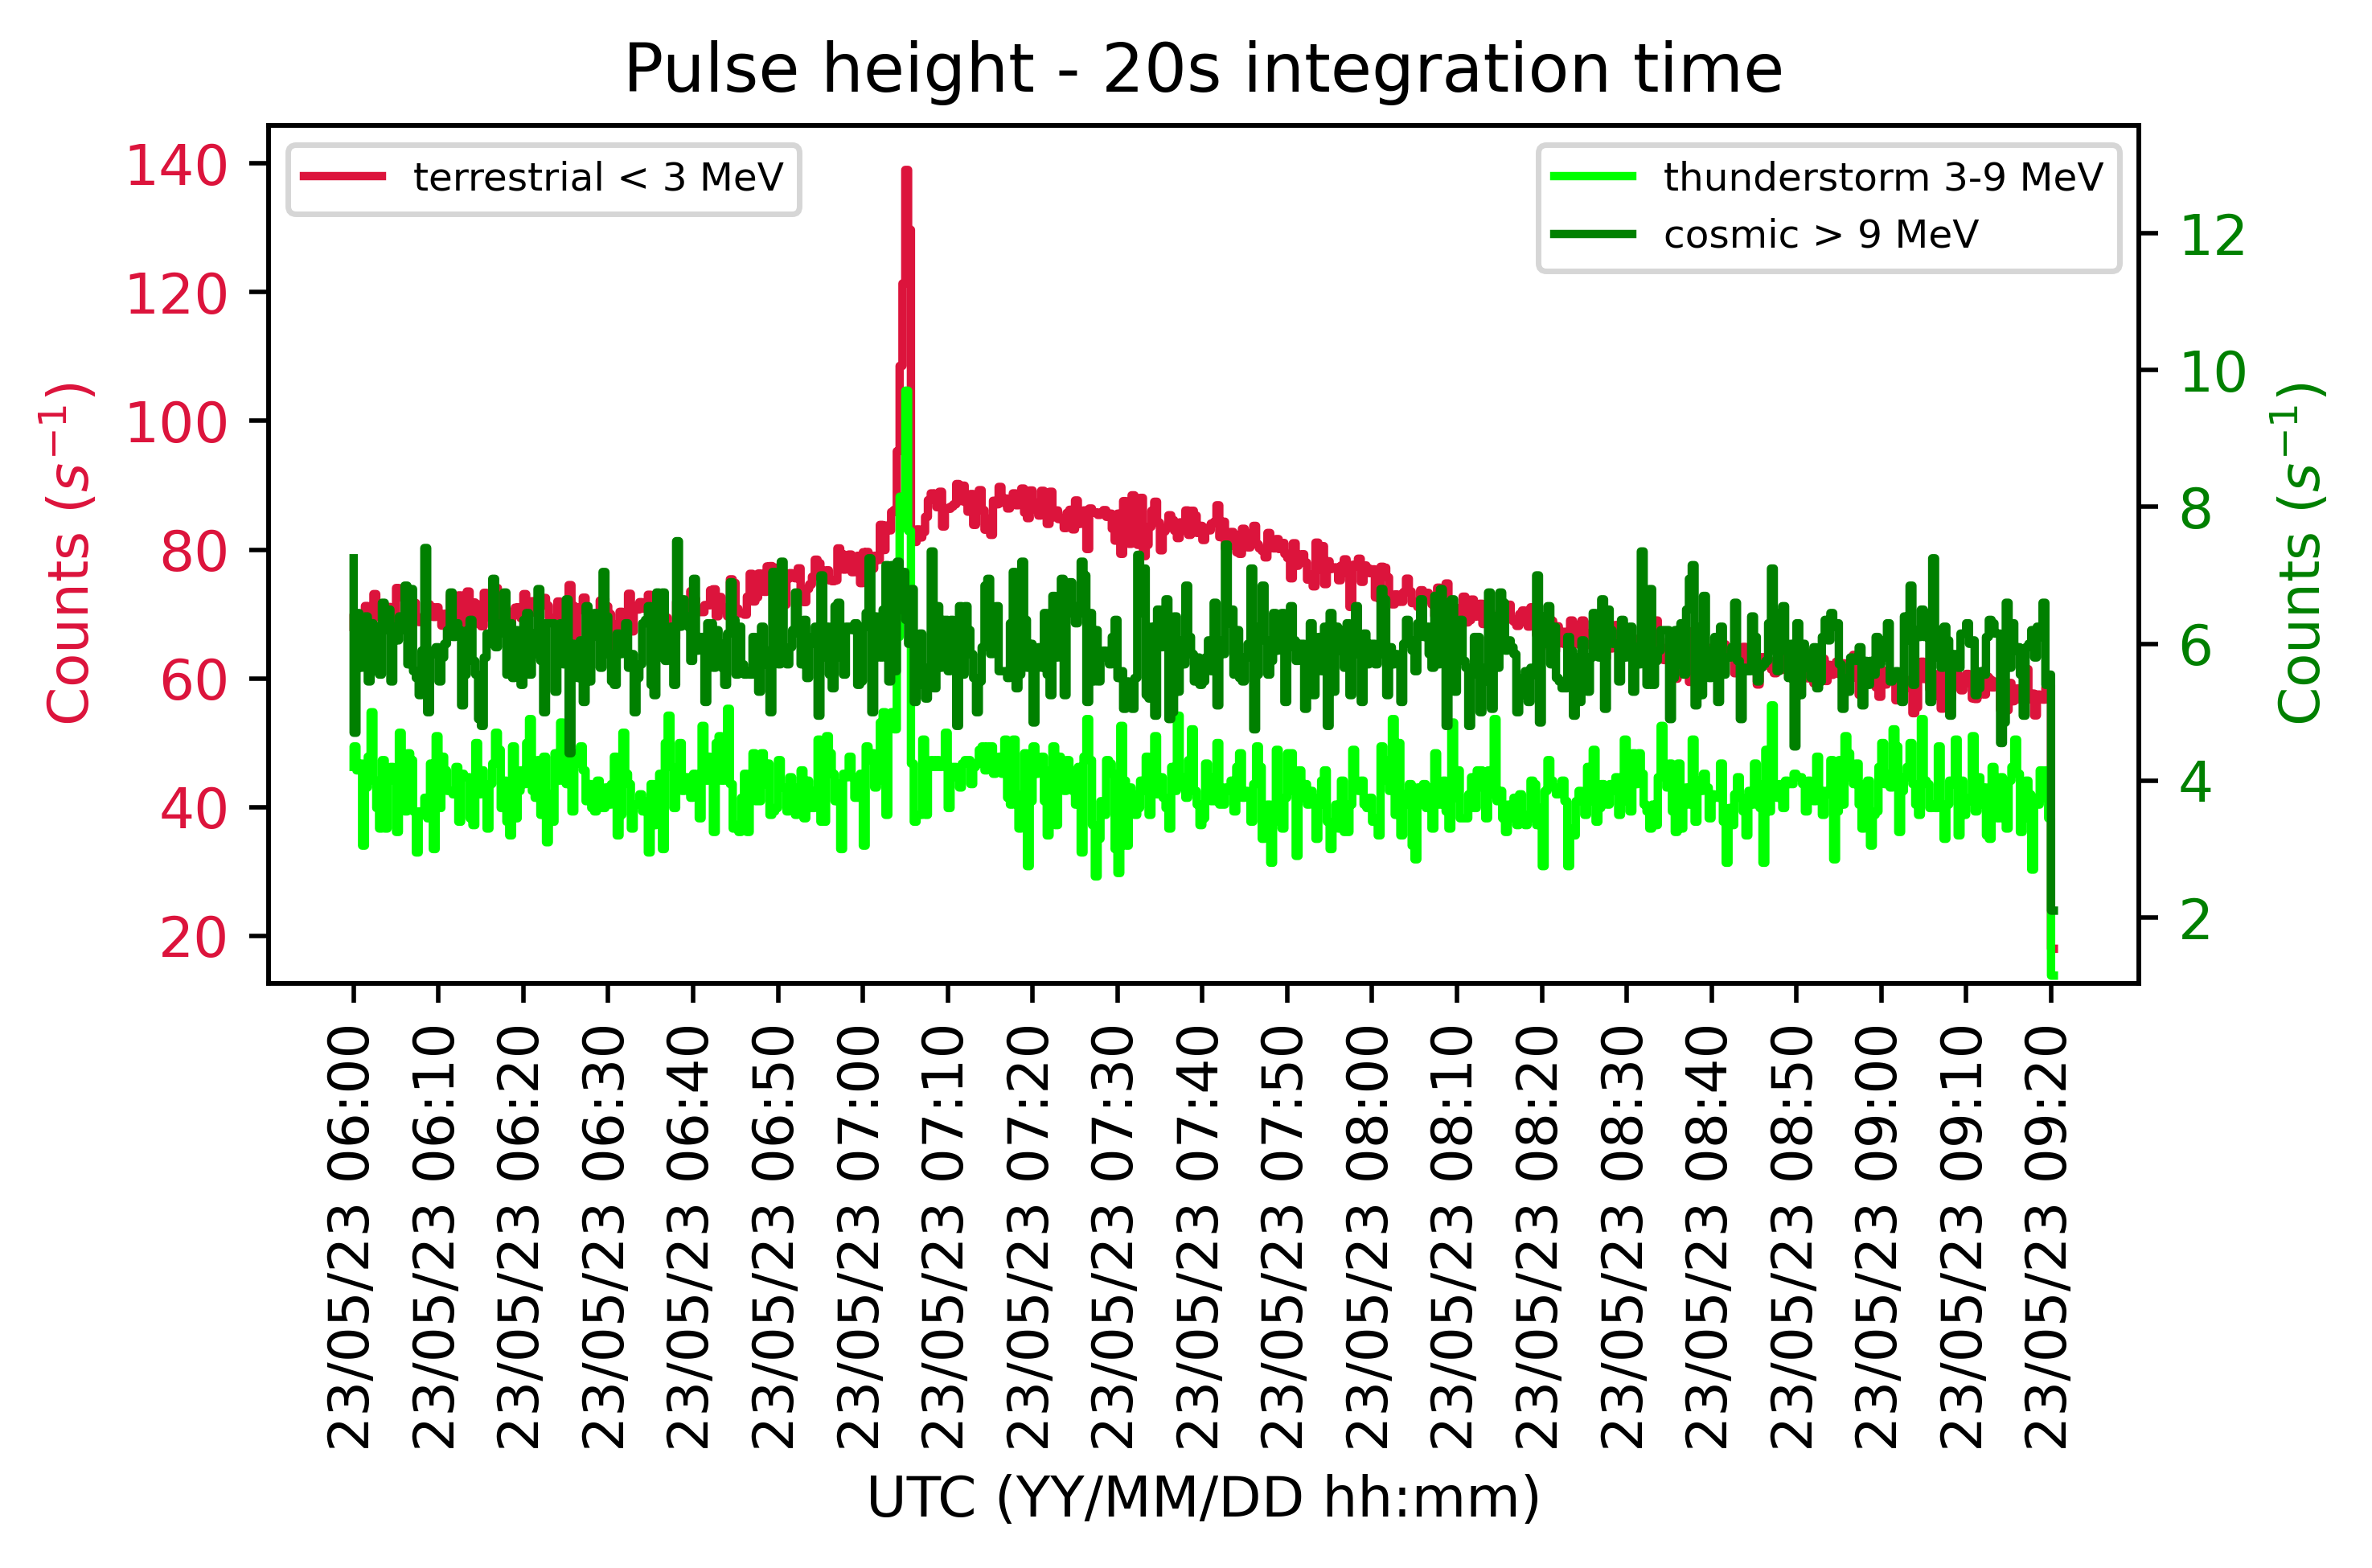

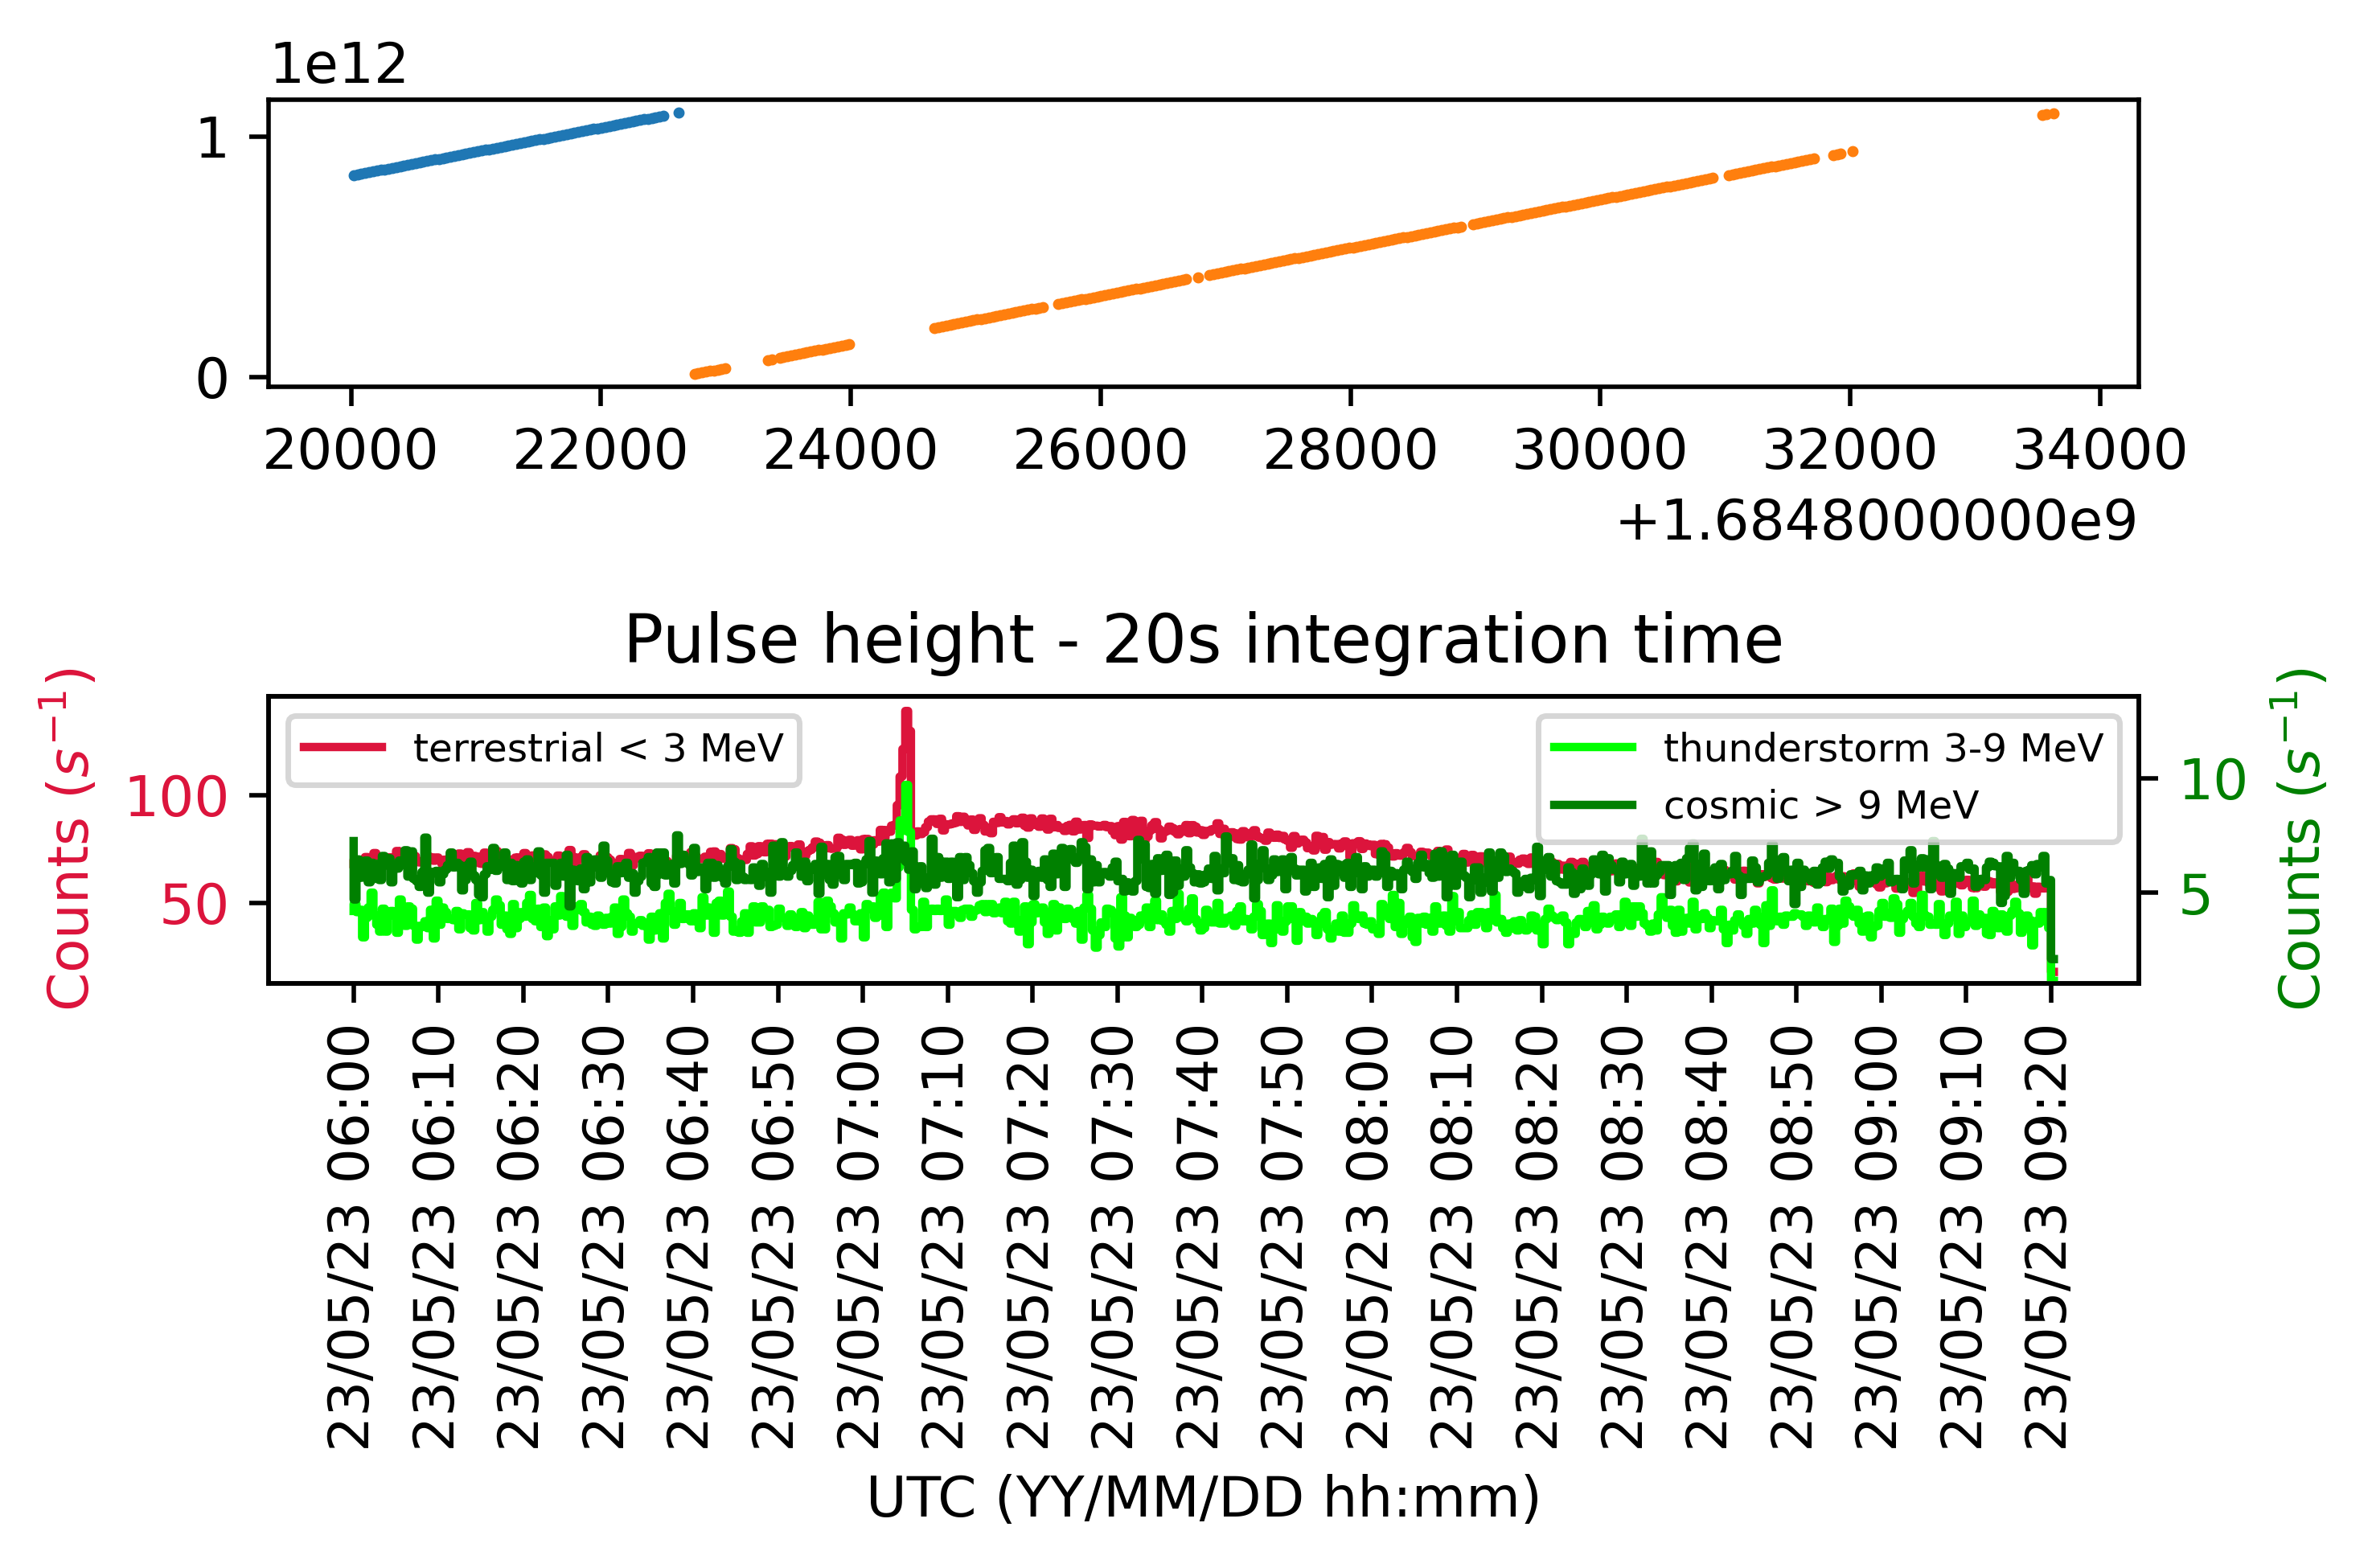

In [4]:
import GROWTH as gr
import importlib
import warnings

warnings.filterwarnings('ignore')
importlib.reload(gr) # Reloads the GROWTH class

# time variable ...
time = ('20230523_060000', '20230523_100000') # tuple (YYYYMMDD_HHMMSS, YYYYMMDD_HHMMSS), to open more than 72 hours is not recommanded (it is going to take ages and it might crush)
GR = 'GR3'
components = ([(0, 2048), (0, 500), (1800, 2048), (500, 1800)], ['total', 'terrestrial', 'cosmic', 'thunderstorm']) # separates the energy spectrum into components list(tuple(left, right)), names[string])
components = ([(0, 500), (500, 1800), (1800, 2048)], ['terrestrial', 'thunderstorm', 'cosmic']) # separates the energy spectrum into components list(tuple(left, right)), names[string])
output = 'Zugpitze_23052023.png'

#file = '/home/sommema4/LS-data2.csv'

foo = gr.GROWTH(GR) # Initializes an instance of GROWTH class
_ = foo.go_through_files(time) 
foo.per_event_data()
foo.time_series('20s', components=components)
foo.plot_time_series(attr='Height', stat='count', file=output)
filename = 'GR3_20230523'
foo.time_series_to_csv(filename)

foo.plot_gps_time_series(attr='Height', stat='count')
#_ = foo.read_fits()
#foo.export()

#data_sec, data_min = foo.read_RT_csv(file)
'''
data_coarse, coarse_freq = foo.time_series('5min', components=components)
figname = time[0] + '_' + coarse_freq + '_timeseries'
print(figname)
foo.plot_time_series(attr='Height', stat='count', data=data_coarse, component=['terrestrial', 'thunderstorm', 'cosmic', 'total'], freq=coarse_freq, file=figname)
figname = time[0] + '_' + coarse_freq + '_hist'
#foo.plot_histogram_waterfall(data=data_coarse, file=figname)
figname = time[0] + '_en_spectrum'
#foo.plot_histogram(figname)
'''
'''
data_fine, fine_freq = foo.time_series('10s', components=components)
figname = time[0] + '_' + fine_freq + '_timeseries'
foo.plot_time_series(attr='Height', stat='count', data=data_fine, freq=fine_freq, component=['terrestrial', 'thunderstorm'], file=figname)
#figname = time[0] + '_cwt'
foo.plot_cwt(file='one_sec_cwt')
'''

#foo.plot_histogram(file='histogram')
#foo.plot_histogram_difference(data=data_coarse)

#del foo
